In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [10]:
# Load the dataset
url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
data = pd.read_csv(url)

In [11]:
# Separate features and target variable
X = data.drop("Class", axis=1)
y = data["Class"]

In [12]:
# Convert dataset into balanced class dataset using RandomOverSampler
X_over, y_over = RandomOverSampler().fit_resample(X, y)

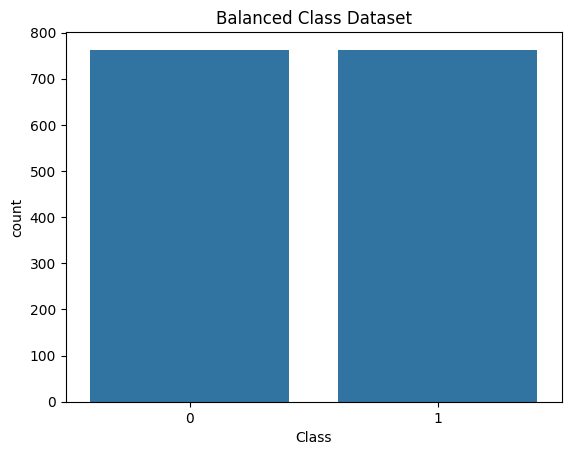

In [13]:
# Plot balanced class dataset graph
sns.countplot(x=y_over)
plt.title('Balanced Class Dataset')
plt.show()

In [14]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

In [18]:
# Define ML models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "AdaBoost": AdaBoostClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier()
}

# Define sampling techniques
samplers = {
    "Simple Random Sampling": RandomOverSampler(),
    "Stratified Sampling": RandomOverSampler(),
    "Cluster Sampling": ClusterCentroids(),
    "Random Over Sampling": RandomOverSampler(),
    "SMOTE": SMOTE()
}

In [16]:
# Iterate over models and sampling techniques
results = {}
for model_name, model in models.items():
    for sampler_name, sampler in samplers.items():
        X_train_sampled, y_train_sampled = sampler.fit_resample(X_train, y_train)

        # Train the model
        model.fit(X_train_sampled, y_train_sampled)

        # Predict and calculate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Save results
        results[(model_name, sampler_name)] = accuracy

# Print accuracy values
for (model_name, sampler_name), accuracy in results.items():
    print(f"{model_name} with {sampler_name}: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules

Random Forest with Simple Random Sampling: 0.9978165938864629
Random Forest with Stratified Sampling: 0.9978165938864629
Random Forest with Cluster Sampling: 1.0
Random Forest with Random Over Sampling: 1.0
Random Forest with SMOTE: 0.9978165938864629
SVM with Simple Random Sampling: 0.74235807860262
SVM with Stratified Sampling: 0.74235807860262
SVM with Cluster Sampling: 0.740174672489083
SVM with Random Over Sampling: 0.740174672489083
SVM with SMOTE: 0.74235807860262
AdaBoost with Simple Random Sampling: 1.0
AdaBoost with Stratified Sampling: 1.0
AdaBoost with Cluster Sampling: 0.9912663755458515
AdaBoost with Random Over Sampling: 1.0
AdaBoost with SMOTE: 1.0
Logistic Regression with Simple Random Sampling: 0.9039301310043668
Logistic Regression with Stratified Sampling: 0.9104803493449781
Logistic Regression with Cluster Sampling: 0.9104803493449781
Logistic Regression with Random Over Sampling: 0.9104803493449781
Logistic Regression with SMOTE: 0.9148471615720524
Decision Tree w

In [17]:
# Find the sampling technique that gives the highest accuracy for each model
best_sampling = {}
for model_name in models.keys():
    best_accuracy = 0
    best_sampler = None
    for sampler_name in samplers.keys():
        accuracy = results[(model_name, sampler_name)]
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_sampler = sampler_name
    best_sampling[model_name] = best_sampler

# Print the results
for model_name, best_sampler in best_sampling.items():
    print(f"Best sampling technique for {model_name}: {best_sampler}")

Best sampling technique for Random Forest: Cluster Sampling
Best sampling technique for SVM: Simple Random Sampling
Best sampling technique for AdaBoost: Simple Random Sampling
Best sampling technique for Logistic Regression: SMOTE
Best sampling technique for Decision Tree: Simple Random Sampling
